In [2]:
import sys
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
filename = "E:\\tensorflow\\jupyter\\machine_learing_damo\\1.data\\data_singlevar.txt"
x=[]
y=[]

In [4]:
with open(filename,'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        x.append(xt)
        y.append(yt)
print(x)
print(y)

[4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36]
[4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99]


# 创建线性回归器

In [5]:
num_training = int(0.8*len(x))
num_test = len(x) - num_training

X_train = np.array(x[:num_training]).reshape(num_training,1)
Y_train = np.array(y[:num_training])

X_test = np.array(x[num_training:]).reshape(num_test,1)
Y_test = np.array(y[num_training:])

In [6]:
linear_regressor = linear_model.LinearRegression()
#训练模型
linear_regressor.fit(X_train,Y_train)

LinearRegression()

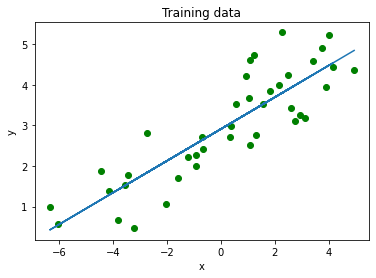

In [7]:
y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X_train,Y_train,color='green')
plt.plot(X_train,y_train_pred)
plt.title('Training data')
plt.show()

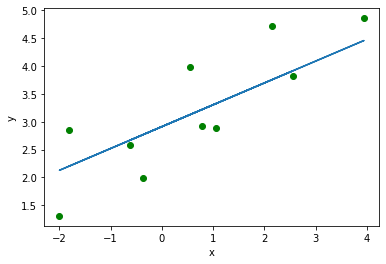

In [8]:
y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X_test,Y_test,color="green")
plt.plot(X_test,y_test_pred)

In [9]:
import sklearn.metrics as sm
#平均绝对误差
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, y_test_pred), 2))
#均方误差
print("Mean squared error =", round(sm.mean_squared_error(Y_test, y_test_pred), 2))
#中位数绝对误差
print("Median absolute error =", round(sm.median_absolute_error(Y_test, y_test_pred),2))
#解释方差分
print("Explained variance score =", round(sm.explained_variance_score(Y_test,y_test_pred), 2))
#R方得分
print("R2 score =", round(sm.r2_score(Y_test, y_test_pred), 2) )

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explained variance score = 0.68
R2 score = 0.68


# 保存模型

In [10]:
import pickle as pk

In [11]:
output_model_file = 'E:\\tensorflow\\jupyter\\machine_learing_damo\\1.data\\saved_model.pkl'
with open(output_model_file, 'wb') as f:
    pk.dump(linear_regressor, f) 

In [12]:
with open(output_model_file, 'rb') as f:
     model_linregr = pk.load(f)
y_test_pred_new = model_linregr.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(Y_test,y_test_pred_new), 2))


New mean absolute error = 0.54


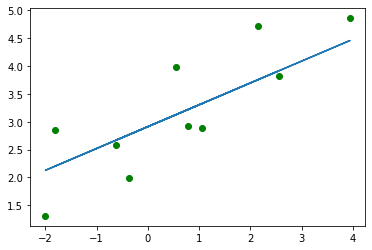

In [13]:
plt.scatter(X_test,Y_test,color="green")
plt.plot(X_test,y_test_pred_new)

# 创建岭回归器

In [18]:
file_name="E:\\tensorflow\\jupyter\\machine_learing_damo\\1.data\\data_multivar.txt"
x=[]
y=[]
with open(file_name,'r') as f:
    for line in f.readlines():
        data= [float(i) for i in line.split(",")]
        x.append(data[:-1])
        y.append(data[-1])
        
num_train = int(0.8*len(x))
num_test = len(x) - num_train

X_train = np.array(x[:num_train])
Y_train = np.array(y[:num_train])

X_test = np.array(x[num_train:])
Y_test = np.array(y[num_train:])

In [19]:
ridge_regressor = linear_model.Ridge(alpha=0.01,fit_intercept=True,max_iter=10000)

In [20]:
ridge_regressor.fit(X_train,Y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, y_test_pred_ridge), 2))
print("Mean squared error =", round(sm.mean_squared_error(Y_test, y_test_pred_ridge), 2))
print("Median absolute error =", round(sm.median_absolute_error(Y_test, y_test_pred_ridge), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_test_pred_ridge), 2))
print("R2 score =", round(sm.r2_score(Y_test, y_test_pred_ridge), 2))

Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explain variance score = 0.84
R2 score = 0.83


In [21]:
linear_regressor = linear_model.LinearRegression()
#训练模型
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_test_pred_ridge = linear_regressor.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, y_test_pred_ridge), 2))
print("Mean squared error =", round(sm.mean_squared_error(Y_test, y_test_pred_ridge), 2))
print("Median absolute error =", round(sm.median_absolute_error(Y_test, y_test_pred_ridge), 2))
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_test_pred_ridge), 2))
print("R2 score =", round(sm.r2_score(Y_test, y_test_pred_ridge), 2))

Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explain variance score = 0.84
R2 score = 0.83
